# Trabalho 03 -  Algoritmos de Machine Learning
## Este trabalho consiste na utilização de algoritmos de machine learning com a finalidade de criar modelos (preditivos, descritivos ou híbridos) que possibilitem extrair padrões ou conhecimento do dataset utilizado nos trabalhos anteriores.

## Universidade Federal do Ceará

**Nome:** Francisco Victor da Silva Pinheiro

**Matrícula:** 549789

**Disciplina:** CKP9011 - INTRODUÇÃO À CIÊNCIA DE DADOS

**Professor:** Dr. José Maria da Silva Monteiro Filho

### Sumário:
#### 1 - Descrição do problema
#### 2 - Descrição dos algoritmos utilizados na resolução do problema
#### 3 - Importação do dataset
#### 4 - Pré-processamento dos dados
#### 5 - Aplicação de modelos
##### 5.1 - Modelo de DecisionTreeRegressor
##### 5.2 - Modelo de Random Forest Regressor
##### 5.3 - Modelo de Gradient Boosting Regressor
##### 5.4 - Gradiente descendente estocástico
##### 5.5 - Regressão polinomial
#### 6 - Avaliação dos modelos
#### 7 - Conclusão

## 1 - Descrição do problema

O ZAP é um portal de imóveis do Grupo OLX Brasil que reúne ofertas qualificadas, além de fotos, dicas e mapas para quem quer alugar, comprar ou vender. A sede fica na Vila Olímpia, em São Paulo, no entanto há escritórios por todo o Brasil.

O problema abordado neste trabalho é a previsão do valor aluguel a partir dos atributos: 

condominio,	
iptu,	
area,	
qtd_quartos,	
qtd_vagas,	
qtd_banheiros.

## 2- Descrição dos algoritmos utilizados na resolução do problema

## 3- Importação de bibliotecas e do dataset

### 3.1 - Importação de bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn import tree, metrics
from plotnine import *
import statsmodels.api as sm
import scipy.stats as stats
import pylab as py
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### 3.2 - Importação do dataset

In [30]:
df = pd.read_csv("dataset-zap-imoveis.csv")
df.head()

,condominio,iptu,area,qtd_quartos,qtd_vagas,qtd_banheiros,aluguel
0,254,190,65,2,1,2,2009
1,290,200,47,2,1,1,1550
2,250,198,37,1,2,1,1750
3,254,900,68,3,1,2,1300
4,600,120,62,2,1,2,2200


### 3.3 - Descrição dos atributos do dataset

In [31]:
df.describe()

,condominio,iptu,area,qtd_quartos,qtd_vagas,qtd_banheiros,aluguel
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000
mean,456.755328,468.599318,68.179454,2.253836,1.370844,1.804774,1663.770247
std,310.894056,381.618290,30.730407,0.678048,0.528193,0.730196,1076.737544
min,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,500.000000
25%,240.000000,220.000000,50.000000,2.000000,1.000000,1.000000,900.000000
50%,380.000000,400.000000,61.000000,2.000000,1.000000,2.000000,1250.000000
75%,600.000000,550.000000,75.000000,3.000000,2.000000,2.000000,2209.000000
max,2555.000000,6000.000000,323.000000,5.000000,4.000000,3.000000,8500.000000


## 4 - Pré-processamento dos dados

### 4.1 - Separando os atributos utilizados para prever do atrubuto predito

In [128]:
X2 = df.iloc[:, [0,1,2,3,4,5]]
y2 = df.iloc[:, [6]]

### 4.2 - Separando os dados em 80% para treino e 20% para teste

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [130]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (3753, 6) y: (3753, 1)
TESTE:
X: (939, 6) y: (939, 1)


### 4.3 - Aplicando a opção escalar padrão para padronizar o conjunto de dados (Padronizando o conjunto de dados para transformar todas as variáveis na mesma ordem de grandeza.)


##### Normalização dos dados

In [131]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## 5 - Aplicação de modelos

### 5.1 - Modelo de DecisionTreeRegressor

##### Usando o gridSearch para escolher os melhores parâmetros para o modelo de Árvore de Decisão

In [132]:
# Criando um parâmetro grid
parameters = {'max_depth':[15, 20, 30],
              'min_samples_leaf':[2, 3, 7], 
              'min_samples_split':[10, 15, 20], 
              }

dtr = tree.DecisionTreeRegressor()

model_dtr = GridSearchCV(estimator=dtr, param_grid=parameters)
model_dtr.fit(X_train_normalized, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'min_samples_leaf': [2, 3, 7],
                         'min_samples_split': [10, 15, 20]})

##### Melhores valores para os parâmetros do modelo de DecisionTreeRegressor

In [133]:
model_dtr.best_params_

{'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 20}

##### Criando um modelo

In [184]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=20, max_depth=15)
dtr.fit(X_train_normalized, y_train)
y_pred_dt = dtr.predict(X_test_normalized)

##### Função custo para DecisionTreeRegressor

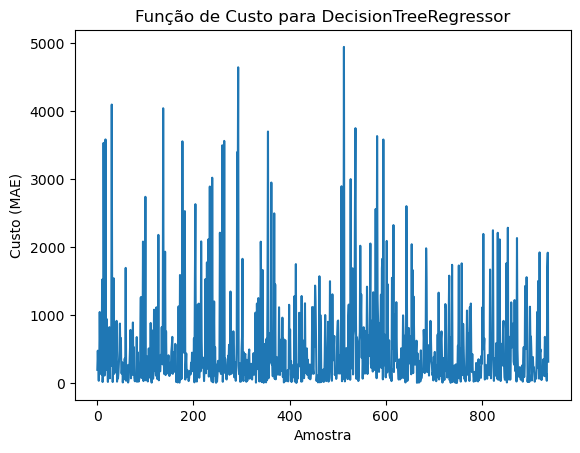

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Convertendo y_true e y_pred para valores numéricos, se necessário
y_true_numeric = np.asarray(y_test, dtype=np.float64)
y_pred_numeric = np.asarray(y_pred_dt, dtype=np.float64)

# Calculando o MAE para cada predição
mae_values = []
for y_true, y_pred in zip(y_true_numeric, y_pred_numeric):
    mae = mean_absolute_error([y_true], [y_pred])
    mae_values.append(mae)

# Plotando a função de custo (MAE)
plt.plot(range(len(y_test)), mae_values)
plt.xlabel('Amostra')
plt.ylabel('Custo (MAE)')
plt.title('Função de Custo para DecisionTreeRegressor')
plt.show()

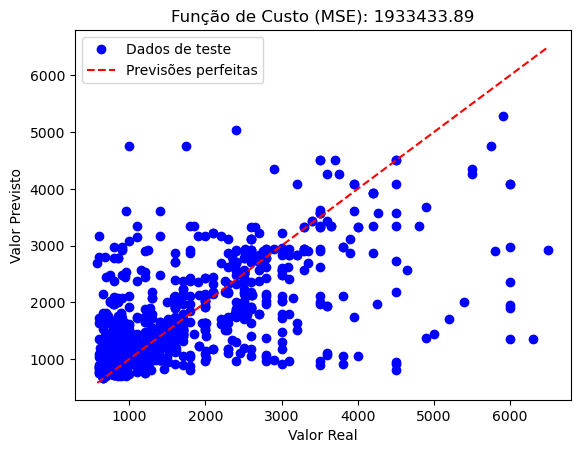

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula o erro quadrático médio (MSE)
mse = np.mean((y_test - y_pred_numeric) ** 2)

# Plot da função de custo
plt.plot(y_test, y_pred_numeric, 'o', color='blue', label='Dados de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Previsões perfeitas')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Função de Custo (MSE): {:.2f}'.format(mse))
plt.legend()
plt.show()

##### Avaliar modelo com as seguintes métricas

Vamos utilizar essas métricas porque elas são as mais indicadas para avaliar modelos de predição, porque essas métricas visam mostrar o quanto o modelo chegou perto de acertar o valor, quanto mais perto de 0, mais próximo o modelo chegou do valor real.

##### Mean Absolute Error

In [187]:
mae_dtr = mean_absolute_error(y_test, y_pred_dt)
mae_dtr

509.2145931902512

##### Mean Squared Error 

In [188]:
mse_dtr = mean_squared_error(y_test, y_pred_dt)
mse_dtr

717893.37697443

##### Root mean squared error

In [189]:
rmse_dtr = mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_dtr

847.2858885727002

#### R2 (Coeficiente de Determinação)

In [190]:
r2_dtr = r2_score(y_test, y_pred_dt)
r2_dtr

0.403495041398366

##### Plotagem das métricas

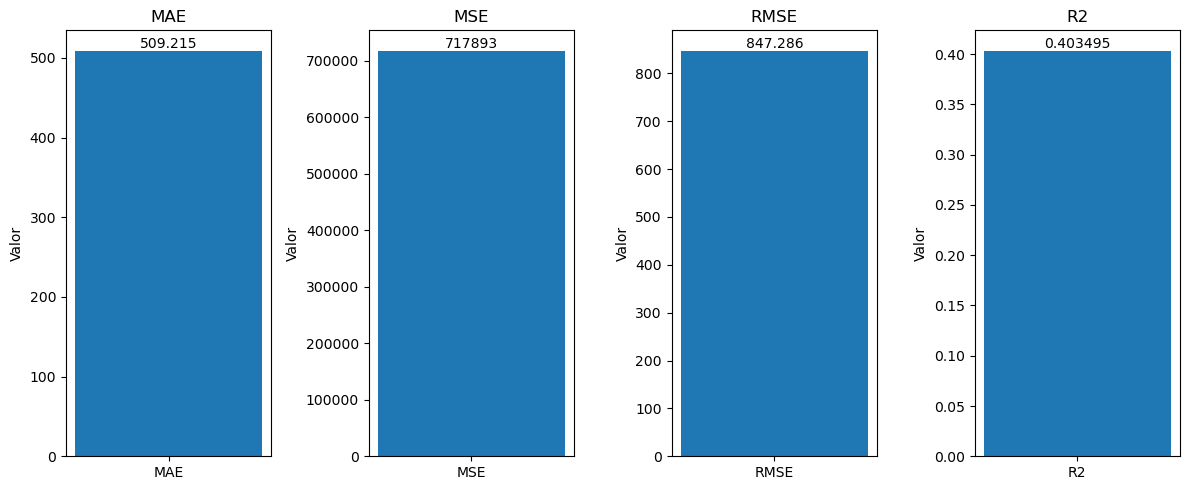

In [191]:
# Dados das métricas
sets = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae_dtr, mse_dtr, rmse_dtr, r2_dtr]

# Criação dos subplots
fig, axes = plt.subplots(1, len(sets), figsize=(12, 5))

# Itera sobre os subplots e plota as métricas com os valores acima das barras
for i, ax in enumerate(axes):
    bar = ax.bar(sets[i], values[i])
    ax.set_title(sets[i])
    ax.set_ylabel('Valor')
    ax.bar_label(bar)

plt.tight_layout()
plt.show()

### 5.2 - Modelo de Random Forest Regressor

##### Usando o gridSearch para escolher os melhores parâmetros para o modelo de Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

# Criando um parâmetro grid
parameters = {'min_samples_leaf':[2, 4, 6], 
              'min_samples_split':[2, 4, 8], 
              'max_depth':[15, 24, 30]}

model_rfr = GridSearchCV(estimator=rfr, param_grid=parameters)
model_rfr.fit(X_train_normalized, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 24, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 8]})

##### Melhores valores para os parâmetros do modelo de RandomForestRegressor

In [144]:
model_rfr.best_params_

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 8}

##### Instanciar Random Forest Regressor

In [145]:
rfr = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, max_depth=24, random_state=42) # n_estimators=40 (número de árvores)

##### Treinar o modelo

In [146]:
rfr_model = rfr.fit(X_train_normalized, y_train)

##### Obter valores preditos

In [147]:
X_range = np.linspace(np.min(X_train_normalized), np.max(X_train_normalized), 100).reshape(-1, 1)
y_pred_rfr = rfr_model.predict(X_test_normalized)

##### Função custo para RandomForestRegressor

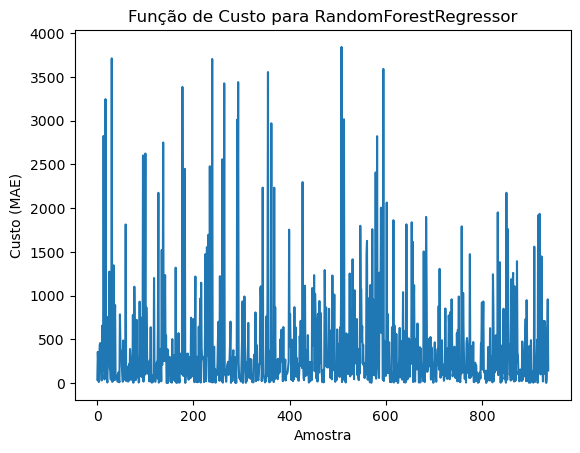

In [148]:
# Convertendo y_true e y_pred para valores numéricos, se necessário
y_test = np.asarray(y_test, dtype=np.float64)
y_pred_rfr = np.asarray(y_pred_rfr, dtype=np.float64)

# Calculando o MAE para cada predição
mae_values = []
for y_true, y_pred in zip(y_test, y_pred_rfr):
    mae = mean_absolute_error([y_true], [y_pred])
    mae_values.append(mae)

# Plotando a função de custo (MAE)
plt.plot(range(len(y_test)), mae_values)
plt.xlabel('Amostra')
plt.ylabel('Custo (MAE)')
plt.title('Função de Custo para RandomForestRegressor')
plt.show()

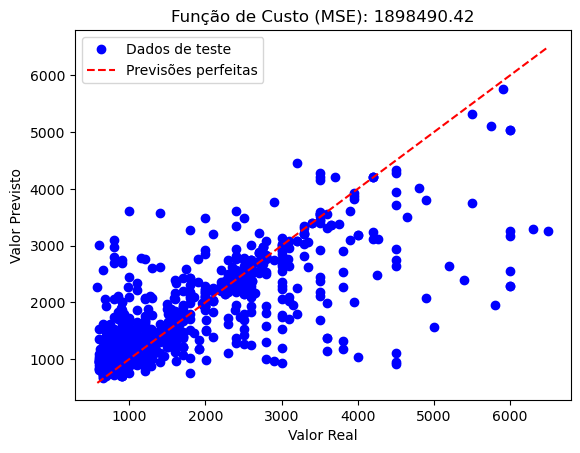

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula o erro quadrático médio (MSE)
mse = np.mean((y_test - y_pred_rfr) ** 2)

# Plot da função de custo
plt.plot(y_test, y_pred_rfr, 'o', color='blue', label='Dados de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Previsões perfeitas')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Função de Custo (MSE): {:.2f}'.format(mse))
plt.legend()
plt.show()

##### Avaliar modelo com as seguintes métricas

##### Mean Absolute Error

In [150]:
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mae_rfr

398.3936659991701

##### Mean Squared Error 

In [151]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_rfr

493435.21674478706

##### Root mean squared error

In [152]:
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
rmse_rfr

702.4494407035904

#### R2 (Coeficiente de Determinação)

In [153]:
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_rfr

0.5899996253239969

##### Plotagem das métricas

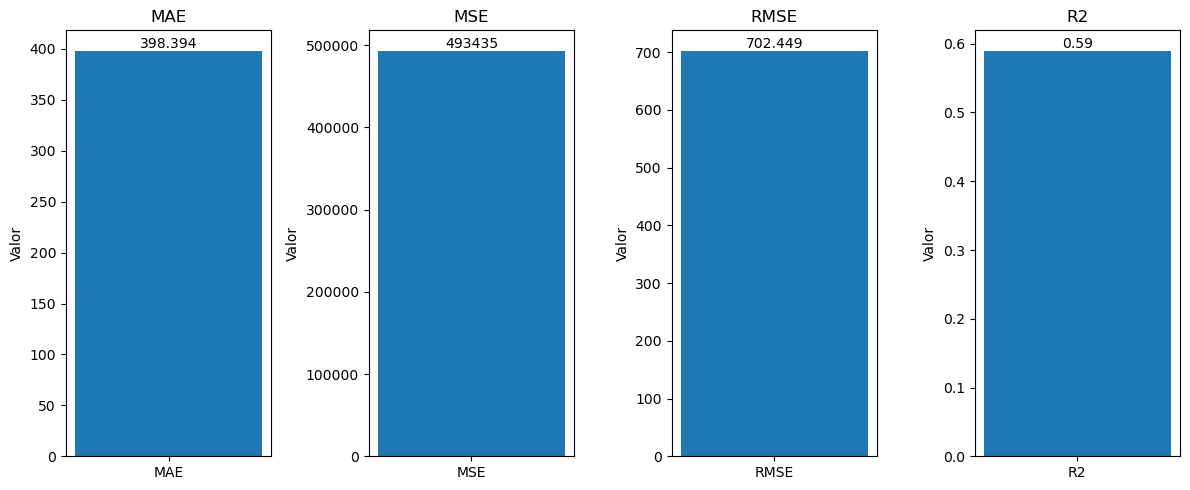

In [154]:
# Dados das métricas
sets = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae_rfr, mse_rfr, rmse_rfr, r2_rfr]

# Criação dos subplots
fig, axes = plt.subplots(1, len(sets), figsize=(12, 5))

# Itera sobre os subplots e plota as métricas com os valores acima das barras
for i, ax in enumerate(axes):
    bar = ax.bar(sets[i], values[i])
    ax.set_title(sets[i])
    ax.set_ylabel('Valor')
    ax.bar_label(bar)

plt.tight_layout()
plt.show()

### 5.3 - Modelo de Gradient Boosting Regressor

In [155]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

##### Instanciar Gradient Boosting Regressor

In [156]:
gbr = GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=4, max_depth=24, random_state=42) 

##### Treinar o modelo

In [157]:
gbr_model = gbr.fit(X_train_normalized, y_train)

##### Obter valores preditos

In [158]:
y_pred_gbr = gbr_model.predict(X_test_normalized)

##### Função custo para  Gradient Boosting Regressor

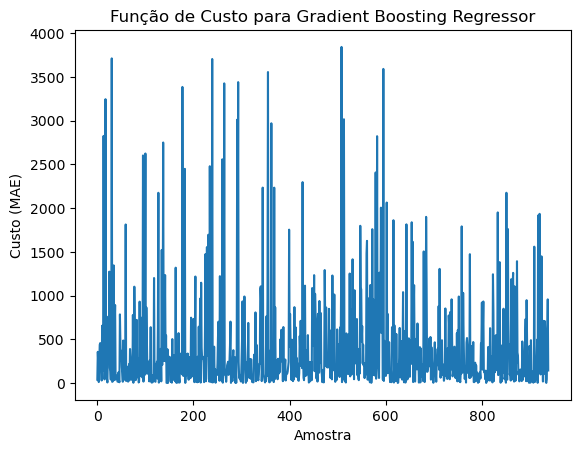

In [159]:
# Convertendo y_true e y_pred para valores numéricos, se necessário
y_test = np.asarray(y_test, dtype=np.float64)
y_pred_gbr = np.asarray(y_pred_gbr, dtype=np.float64)

# Calculando o MAE para cada predição
mae_values = []
for y_true, y_pred in zip(y_test, y_pred_rfr):
    mae = mean_absolute_error([y_true], [y_pred])
    mae_values.append(mae)

# Plotando a função de custo (MAE)
plt.plot(range(len(y_test)), mae_values)
plt.xlabel('Amostra')
plt.ylabel('Custo (MAE)')
plt.title('Função de Custo para Gradient Boosting Regressor')
plt.show()

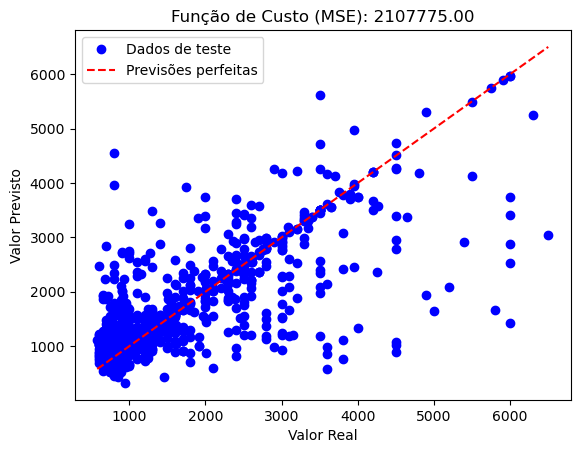

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula o erro quadrático médio (MSE)
mse = np.mean((y_test - y_pred_gbr) ** 2)

# Plot da função de custo
plt.plot(y_test, y_pred_gbr, 'o', color='blue', label='Dados de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Previsões perfeitas')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Função de Custo (MSE): {:.2f}'.format(mse))
plt.legend()
plt.show()

##### Avaliar modelo com as seguintes métricas

##### Mean Absolute Error

In [161]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mae_gbr

400.40307960837436

##### Mean Squared Error 

In [162]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mse_gbr

541740.5290946607

##### Root mean squared error

In [163]:
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
rmse_gbr

736.0302501220046

#### R2 (Coeficiente de Determinação)

In [164]:
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_gbr

0.5498622466161186

##### Plotagem das métricas

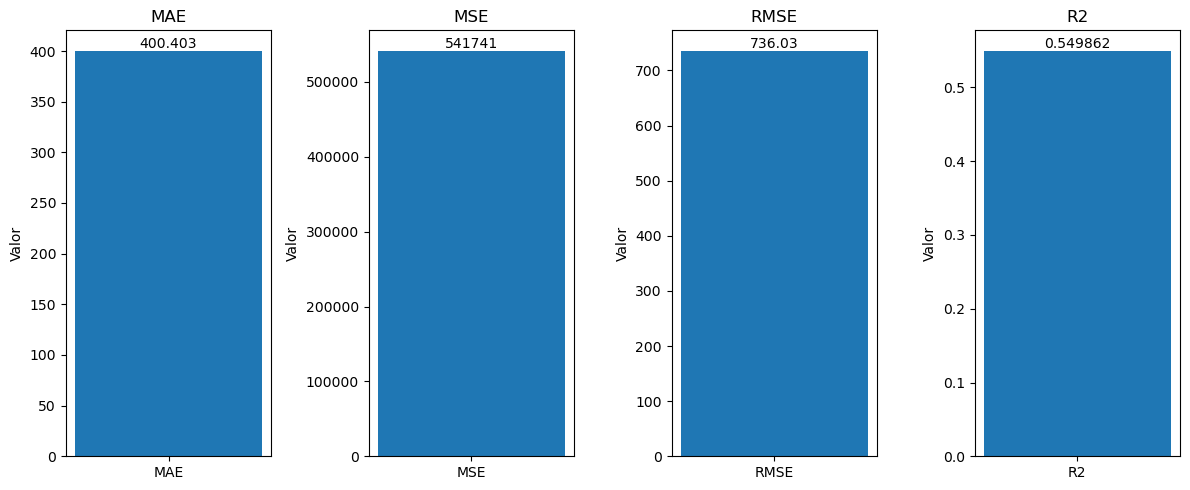

In [165]:
# Dados das métricas
sets = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]

# Criação dos subplots
fig, axes = plt.subplots(1, len(sets), figsize=(12, 5))

# Itera sobre os subplots e plota as métricas com os valores acima das barras
for i, ax in enumerate(axes):
    bar = ax.bar(sets[i], values[i])
    ax.set_title(sets[i])
    ax.set_ylabel('Valor')
    ax.bar_label(bar)

plt.tight_layout()
plt.show()

### 5.4 - Gradiente descendente estocástico

In [166]:
gde = SGDRegressor(max_iter=1000, tol=1e-3)

##### Treinar o modelo

In [167]:
gde_model = gde.fit(X_train_normalized, y_train)

##### Obter valores preditos

In [168]:
y_pred_gde = gde_model.predict(X_test_normalized)

##### Função custo para Gradiente descendente estocástico

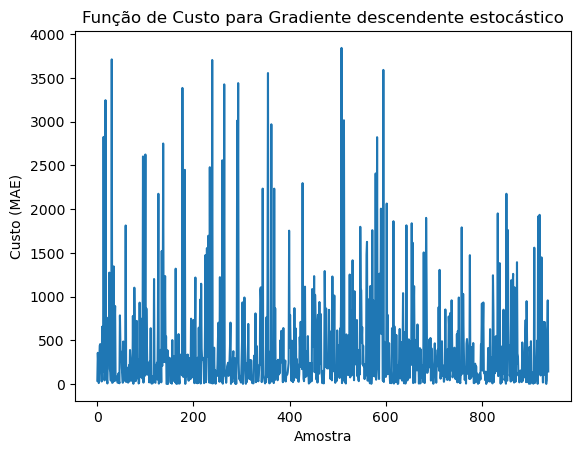

In [169]:
# Convertendo y_true e y_pred para valores numéricos, se necessário
y_test = np.asarray(y_test, dtype=np.float64)
y_pred_gde = np.asarray(y_pred_gde, dtype=np.float64)

# Calculando o MAE para cada predição
mae_values = []
for y_true, y_pred in zip(y_test, y_pred_rfr):
    mae = mean_absolute_error([y_true], [y_pred])
    mae_values.append(mae)

# Plotando a função de custo (MAE)
plt.plot(range(len(y_test)), mae_values)
plt.xlabel('Amostra')
plt.ylabel('Custo (MAE)')
plt.title('Função de Custo para Gradiente descendente estocástico')
plt.show()

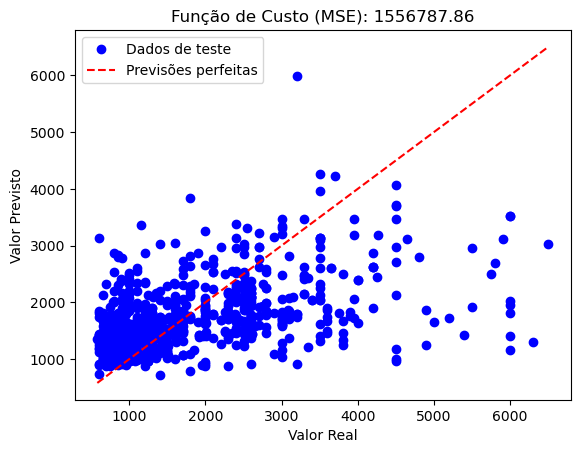

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Calcula o erro quadrático médio (MSE)
mse = np.mean((y_test - y_pred_gde) ** 2)

# Plot da função de custo
plt.plot(y_test, y_pred_gde, 'o', color='blue', label='Dados de teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Previsões perfeitas')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Função de Custo (MSE): {:.2f}'.format(mse))
plt.legend()
plt.show()

##### Avaliar modelo com as seguintes métricas

##### Mean Absolute Error

In [171]:
mae_gde = mean_absolute_error(y_test, y_pred_gde)
mae_gde

651.9549698984995

##### Mean Squared Error 

In [172]:
mse_gde = mean_squared_error(y_test, y_pred_gde)
mse_gde

874187.8499429224

##### Root mean squared error

In [173]:
rmse_gde = mean_squared_error(y_test, y_pred_gde, squared=False)
rmse_gde

934.980133448258

#### R2 (Coeficiente de Determinação)

In [174]:
r2_gde = r2_score(y_test, y_pred_gde)
r2_gde

0.27362836325647344

##### Plotagem das métricas

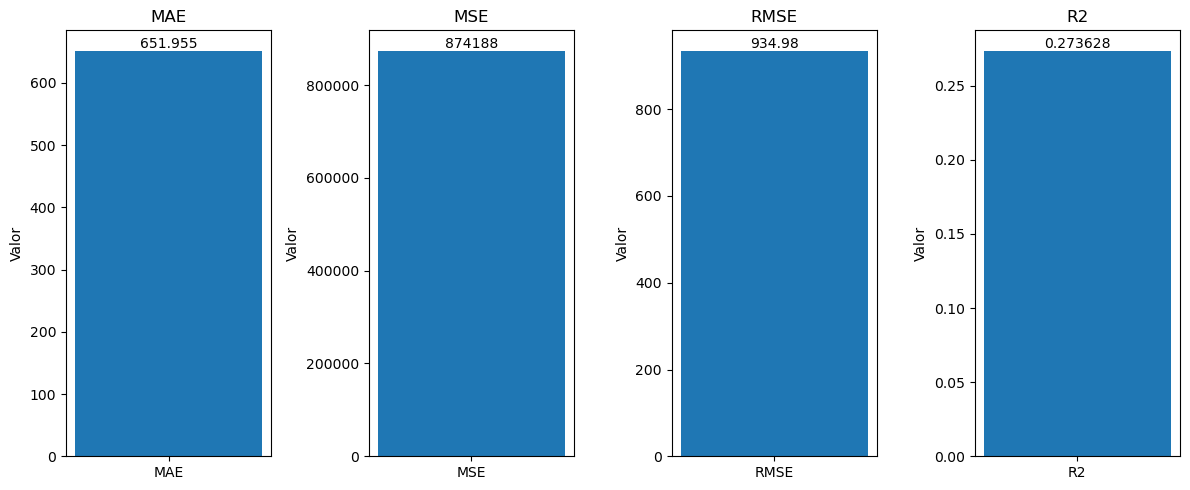

In [175]:
# Dados das métricas
sets = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae_gde, mse_gde, rmse_gde, r2_gde]

# Criação dos subplots
fig, axes = plt.subplots(1, len(sets), figsize=(12, 5))

# Itera sobre os subplots e plota as métricas com os valores acima das barras
for i, ax in enumerate(axes):
    bar = ax.bar(sets[i], values[i])
    ax.set_title(sets[i])
    ax.set_ylabel('Valor')
    ax.bar_label(bar)

plt.tight_layout()
plt.show()

#### 5.5 - Regressão polinomial

In [176]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6],
    'ridge__alpha':[0, 1, 2]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='r2',
                           refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid=[{'poly__degree': [2, 3, 4, 5, 6],
                          'ridge__alpha': [0, 1, 2]}],
             scoring='r2')

#### melhores hiperparametros

In [177]:
grid_search.best_params_

{'poly__degree': 2, 'ridge__alpha': 2}

#### Resultados

In [178]:
grid_search.cv_results_

{'mean_fit_time': array([0.0114027 , 0.0058032 , 0.0066083 , 0.01451297, 0.00939002,
        0.00953655, 0.04357648, 0.01791115, 0.01630325, 0.13746018,
        0.13903537, 0.12006178, 0.42331314, 0.43557525, 0.46242485]),
 'std_fit_time': array([0.00102102, 0.00074952, 0.00079888, 0.00044939, 0.00094798,
        0.00097615, 0.00219412, 0.00273361, 0.00183461, 0.00699106,
        0.00318139, 0.00937622, 0.02150857, 0.00607616, 0.04222676]),
 'mean_score_time': array([0.00330057, 0.00300083, 0.00289731, 0.00364132, 0.00339723,
        0.00433302, 0.00460362, 0.00456672, 0.0052011 , 0.00851154,
        0.00800314, 0.00660286, 0.0091794 , 0.00880656, 0.00851388]),
 'std_score_time': array([5.97887203e-04, 2.59252114e-06, 1.11159482e-03, 5.33050443e-04,
        4.90766608e-04, 5.94583184e-04, 1.03087017e-03, 5.35512148e-04,
        7.51593007e-04, 2.07916967e-03, 2.19164645e-03, 1.01795585e-03,
        1.94640896e-03, 1.46707978e-03, 8.83630634e-04]),
 'param_poly__degree': masked_array(da

### 6 - Avaliação dos modelos

##### Definir pipeline para cada algoritmo

In [192]:
# Decision Tree Regressor
dt_pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor())
])

# Random Forest Regressor
rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor())
])

# Gradient Boosting Regressor
gb_pipeline = Pipeline([
    ('regressor', GradientBoostingRegressor())
])

# Gradient Descent Regressor
sgd_pipeline = Pipeline([
    ('regressor', SGDRegressor())
])

# Polynomial Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', SGDRegressor())
])



##### Lista de pipelines

In [193]:

pipelines = [dt_pipeline, rf_pipeline, gb_pipeline, sgd_pipeline, poly_pipeline]
algorithm_names = ['Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor',
                   'Gradient Descent Regressor', 'Polynomial Regression']



##### Loop para treinar e avaliar cada modelo

In [194]:
for pipeline, name in zip(pipelines, algorithm_names):
    # Treinar o modelo
    pipeline.fit(X_train_normalized, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = pipeline.predict(X_test_normalized)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Imprimir os resultados
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score (R2): {r2}")
    print("-------------------------------------")
    print("\n")

Model: Decision Tree Regressor
Mean Absolute Error (MAE): 469.1199148029819
Mean Squared Error (MSE): 968959.620345328
Root Mean Squared Error (RMSE): 984.357465733525
R-squared Score (R2): 0.19488152870738673
-------------------------------------


Model: Random Forest Regressor
Mean Absolute Error (MAE): 391.0149474991368
Mean Squared Error (MSE): 496584.9288512555
Root Mean Squared Error (RMSE): 704.6878236859607
R-squared Score (R2): 0.5873824972797261
-------------------------------------


Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 534.5723337010774
Mean Squared Error (MSE): 661113.3871560615
Root Mean Squared Error (RMSE): 813.0887941400136
R-squared Score (R2): 0.45067411640077204
-------------------------------------


Model: Gradient Descent Regressor
Mean Absolute Error (MAE): 653.140929722634
Mean Squared Error (MSE): 870426.5425057947
Root Mean Squared Error (RMSE): 932.9665280736467
R-squared Score (R2): 0.2767536721241045
------------------------------

##### Mostrar modelo campeão

##### Definir listas vazias para armazenar as métricas

In [196]:
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

In [197]:
# Loop para treinar e avaliar cada modelo
for pipeline, name in zip(pipelines, algorithm_names):
    # Treinar o modelo
    pipeline.fit(X_train_normalized, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = pipeline.predict(X_test_normalized)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Armazenar as métricas
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Imprimir os resultados
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score (R2): {r2}")
    print("-------------------------------------")
    print("\n")

# Identificar o melhor modelo com base nas métricas
best_mse_index = np.argmin(mse_scores)
best_rmse_index = np.argmin(rmse_scores)
best_r2_index = np.argmax(r2_scores)

best_mse_model = algorithm_names[best_mse_index]
best_rmse_model = algorithm_names[best_rmse_index]
best_r2_model = algorithm_names[best_r2_index]

print("Melhor modelo com base em MSE:", best_mse_model)
print("Melhor modelo com base em RMSE:", best_rmse_model)
print("Melhor modelo com base em R2:", best_r2_model)


Model: Decision Tree Regressor
Mean Absolute Error (MAE): 478.5693290734824
Mean Squared Error (MSE): 974719.9132100778
Root Mean Squared Error (RMSE): 987.2790452602941
R-squared Score (R2): 0.1900952423770934
-------------------------------------


Model: Random Forest Regressor
Mean Absolute Error (MAE): 391.7703813358073
Mean Squared Error (MSE): 505684.8411066729
Root Mean Squared Error (RMSE): 711.115209446875
R-squared Score (R2): 0.5798212869979524
-------------------------------------


Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 534.5944660798876
Mean Squared Error (MSE): 660794.6630364654
Root Mean Squared Error (RMSE): 812.8927746243445
R-squared Score (R2): 0.4509389475356771
-------------------------------------


Model: Gradient Descent Regressor
Mean Absolute Error (MAE): 648.049775093343
Mean Squared Error (MSE): 877348.3542769778
Root Mean Squared Error (RMSE): 936.6687537635585
R-squared Score (R2): 0.27100226783978154
------------------------------

### 7 - Conclusão

O modelo melhor avaliado foi o Random Forest Regressor, por se sobressair nas mpettricas de MSE, RMSE e R2.

Model: Random Forest Regressor

Mean Absolute Error (MAE): 534.464157306287

Mean Squared Error (MSE): 660803.1502157416

Root Mean Squared Error (RMSE): 812.8979949635388

R-squared Score (R2): 0.4509318954515026